# 의사결정트기 (Decision Tree)

> 스무고개

- 머신러닝 기법 중 지도학습에 해당
- 의사결정 규칙을 나무 구조로 도표화하여 분류와 예측을 수행한다
- 분류와 회귀에 모두 적용 가능함
- 장점: 결과가 이해하기 쉽고 직관적이다. 결과에 대한 원인 설명이 필요한 경우 많이 사용
- 단점: 과적합 가능성이 매우 크기 때문에 정확도가 떨어진다.
- 사용 예시
    - 은행에서 대출 가능 여부 판단
    - 환자가 어떠한 조건에 부합하여 병에 걸렸는가에 대한 내용

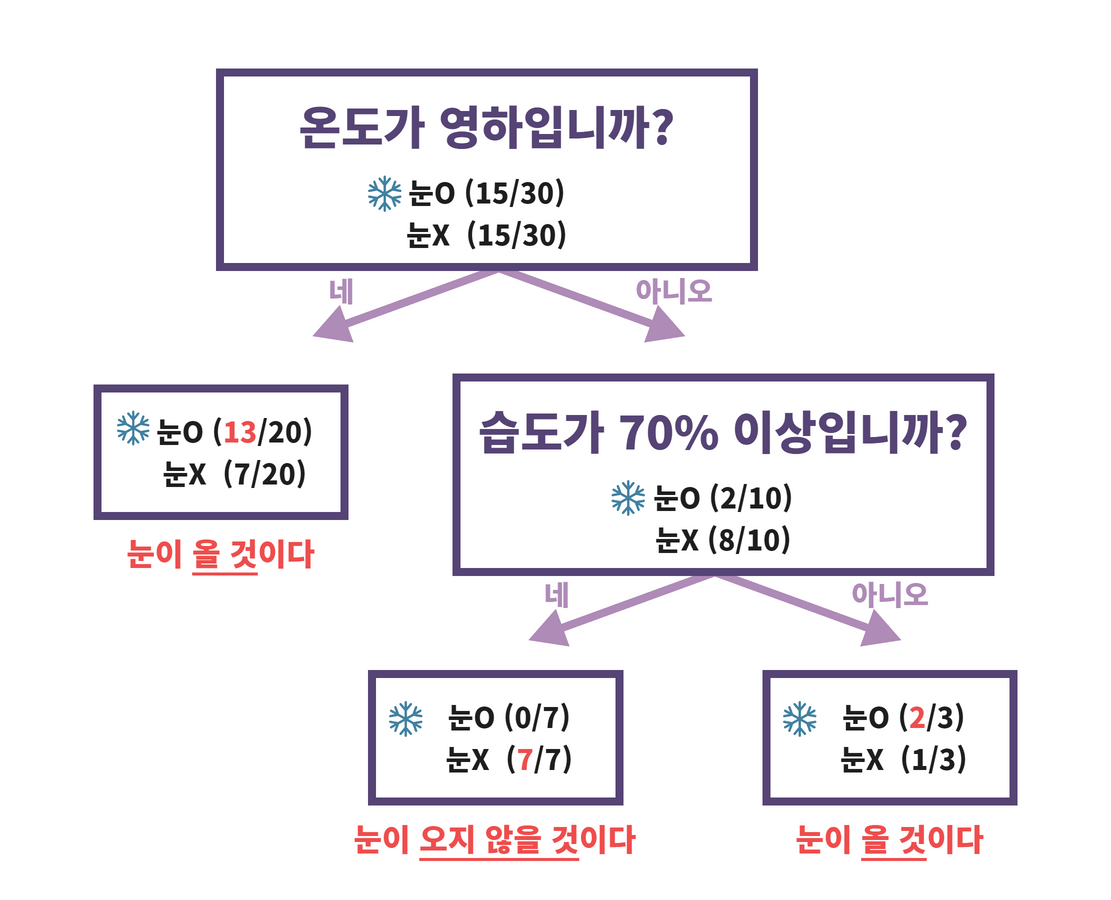

In [19]:
from IPython.display import display, Image
display(Image('image18_decisiontree.png', width=500, height=500))